A Predictive Analysis of Heart Disease 

Given a data set with various measurements of variables correlated to heart disease we are taking the given data to make a predictive data frame. This data frame will allow us to take a set of unknown values and predict whether or not it could indicate the development of heart disease in an individual. The question we are looking to answer is, given an unknown observation, is the person likely to develop heart disease or not? The data set that will be used to answer this question is the cleveland_data set, it has values for the following variables: age, sex, chest_pain, resting_bp, cholesterol, fasting_blood_sugar, resting_electro, max_hr, ex_angina, oldpeak, slope, ca, thal, num, some of which will be used to help us make our predictive data frame. 

In [141]:
library(tidyverse)
library(tidymodels)
library(repr)
library(readxl)
options(repr.matrix.max.rows = 6)

In [142]:
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", destfile = "cleveland_data")

In [143]:
heart_disease_data <- read_delim("cleveland_data", col_names = FALSE, skip=20, delim= ",")
heart_disease_data

Rows: 283 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
64,1,1,110,211,0,2,144,1,1.8,2,0.0,3.0,0
58,0,1,150,283,1,2,162,0,1.0,1,0.0,3.0,0
58,1,2,120,284,0,2,160,0,1.8,2,0.0,3.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [144]:
names(heart_disease_data) <- c("age", "sex", "chest_pain", "resting_bp", "cholesterol", "fasting_blood_sugar", "resting_electro", "max_hr", "ex_angina", "oldpeak", "slope", "ca", "thal", "num")
heart_disease_data <- heart_disease_data |>
mutate(sex = case_when(sex == 1 ~ "male" , sex == 0 ~ "female"))|>
mutate(chest_pain = case_when(chest_pain == 1 ~ "typical angina", chest_pain == 2 ~ "atypical angina", chest_pain == 3 ~ "non-anginal pain", chest_pain == 4 ~ "asymptomatic"))|>
mutate(fasting_blood_sugar = case_when(fasting_blood_sugar == 1 ~ "true" , fasting_blood_sugar == 0 ~ "false"))|>
mutate(resting_electro = case_when(resting_electro == 0 ~ "normal", resting_electro == 1 ~ "abnormal", resting_electro == 2 ~ "hypertrophy"))|>
mutate(ex_angina = case_when(ex_angina == 1 ~ "yes" , ex_angina == 0 ~ "no"))|>
mutate(slope = case_when(slope == 1 ~ "upsloping", slope == 2 ~ "flat", slope == 3 ~ "downsloping"))|>
mutate(thal = case_when(thal == "3.0" ~ "normal", thal == "6.0" ~ "fixed defect", thal == "7.0" ~ "reversable defect"))|>
mutate(num = case_when(num == 0 ~ "healthy" , num == 1 ~ "sick", num == 2 ~ "sick", num == 3 ~ "sick", num == 4 ~ "sick"))
heart_disease_data$ca[heart_disease_data$ca == "?"] <- NA
heart_disease_data$thal[heart_disease_data$thal == "?"] <- NA
heart_disease_data

age,sex,chest_pain,resting_bp,cholesterol,fasting_blood_sugar,resting_electro,max_hr,ex_angina,oldpeak,slope,ca,thal,num
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
64,male,typical angina,110,211,false,hypertrophy,144,yes,1.8,flat,0.0,normal,healthy
58,female,typical angina,150,283,true,hypertrophy,162,no,1.0,upsloping,0.0,normal,healthy
58,male,atypical angina,120,284,false,hypertrophy,160,no,1.8,flat,0.0,normal,sick
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,male,asymptomatic,130,131,false,normal,115,yes,1.2,flat,1.0,reversable defect,sick
57,female,atypical angina,130,236,false,hypertrophy,174,no,0.0,flat,1.0,normal,sick
38,male,non-anginal pain,138,175,false,normal,173,no,0.0,upsloping,NA,normal,healthy


In [145]:
heart_disease_split <- initial_split(heart_disease_data, prop = 0.75, strata = num)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split) 

In [146]:
glimpse(heart_disease_train)

Rows: 212
Columns: 14
$ age                 <dbl> 58, 50, 58, 66, 43, 69, 59, 44, 42, 61, 40, 71, 59…
$ sex                 <chr> "female", "female", "female", "female", "male", "f…
$ chest_pain          <chr> "typical angina", "non-anginal pain", "non-anginal…
$ resting_bp          <dbl> 150, 120, 120, 150, 150, 140, 135, 130, 140, 150, …
$ cholesterol         <dbl> 283, 219, 340, 226, 247, 239, 234, 233, 226, 243, …
$ fasting_blood_sugar <chr> "true", "false", "false", "false", "false", "false…
$ resting_electro     <chr> "hypertrophy", "normal", "normal", "normal", "norm…
$ max_hr              <dbl> 162, 158, 172, 114, 171, 151, 161, 179, 178, 137, …
$ ex_angina           <chr> "no", "no", "no", "no", "no", "no", "no", "yes", "…
$ oldpeak             <dbl> 1.0, 1.6, 0.0, 2.6, 1.5, 1.8, 0.5, 0.4, 0.0, 1.0, …
$ slope               <chr> "upsloping", "flat", "upsloping", "downsloping", "…
$ ca                  <chr> "0.0", "0.0", "0.0", "0.0", "0.0", "2.0", "0.0", "…
$ thal            

In [147]:
glimpse(heart_disease_test)

Rows: 71
Columns: 14
$ age                 <dbl> 64, 40, 61, 51, 50, 65, 44, 51, 54, 62, 58, 51, 66…
$ sex                 <chr> "male", "male", "female", "male", "male", "female"…
$ chest_pain          <chr> "typical angina", "asymptomatic", "asymptomatic", …
$ resting_bp          <dbl> 110, 110, 130, 110, 150, 140, 130, 130, 135, 120, …
$ cholesterol         <dbl> 211, 167, 330, 175, 243, 417, 219, 305, 304, 267, …
$ fasting_blood_sugar <chr> "false", "false", "false", "false", "false", "true…
$ resting_electro     <chr> "hypertrophy", "hypertrophy", "hypertrophy", "norm…
$ max_hr              <dbl> 144, 114, 169, 123, 128, 157, 188, 142, 170, 99, 1…
$ ex_angina           <chr> "yes", "yes", "no", "no", "no", "no", "no", "yes",…
$ oldpeak             <dbl> 1.8, 2.0, 0.0, 0.6, 2.6, 0.8, 0.0, 1.2, 0.0, 1.8, …
$ slope               <chr> "flat", "flat", "upsloping", "upsloping", "flat", …
$ ca                  <chr> "0.0", "0.0", "0.0", "0.0", "0.0", "1.0", "0.0", "…
$ thal             

In [148]:
heart_disease_proportions <- heart_disease_train |>
                      group_by(num) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(heart_disease_train))

heart_disease_proportions

num,n,percent
<chr>,<int>,<dbl>
healthy,113,53.30189
sick,99,46.69811


In [149]:
heart_disease_table <- heart_disease_train |>
group_by(num) |>
summarize (n = n())
heart_disease_table

num,n
<chr>,<int>
healthy,113
sick,99


In [150]:
heart_disease_table2 <- heart_disease_train |>
group_by(num)|>
summarize(resting_bp = mean(resting_bp),
          cholesterol = mean(cholesterol),
          max_hr = mean(max_hr))
heart_disease_table2

num,resting_bp,cholesterol,max_hr
<chr>,<dbl>,<dbl>,<dbl>
healthy,128.3982,242.7699,157.7522
sick,134.3535,251.8586,139.3434


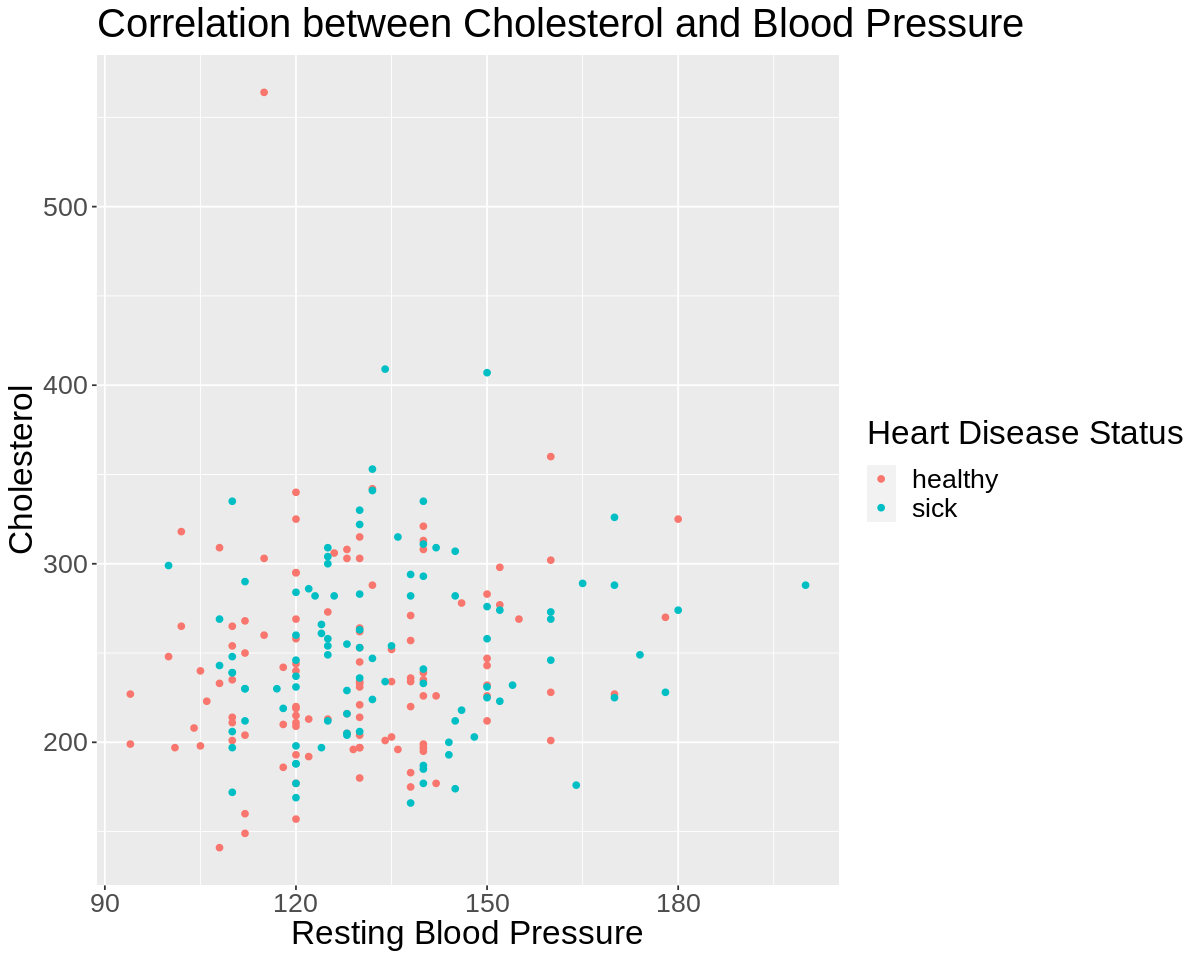

In [151]:
options(repr.plot.width = 10, repr.plot.height = 8) 
heart_disease_plot <- heart_disease_train |>
    ggplot(aes(x = resting_bp, y = cholesterol, colour = num)) + 
        geom_point()+ 
    labs(x = "Resting Blood Pressure", y = "Cholesterol", colour = "Heart Disease Status") +
    ggtitle("Correlation between Cholesterol and Blood Pressure") +
    theme(text = element_text(size = 20))
heart_disease_plot

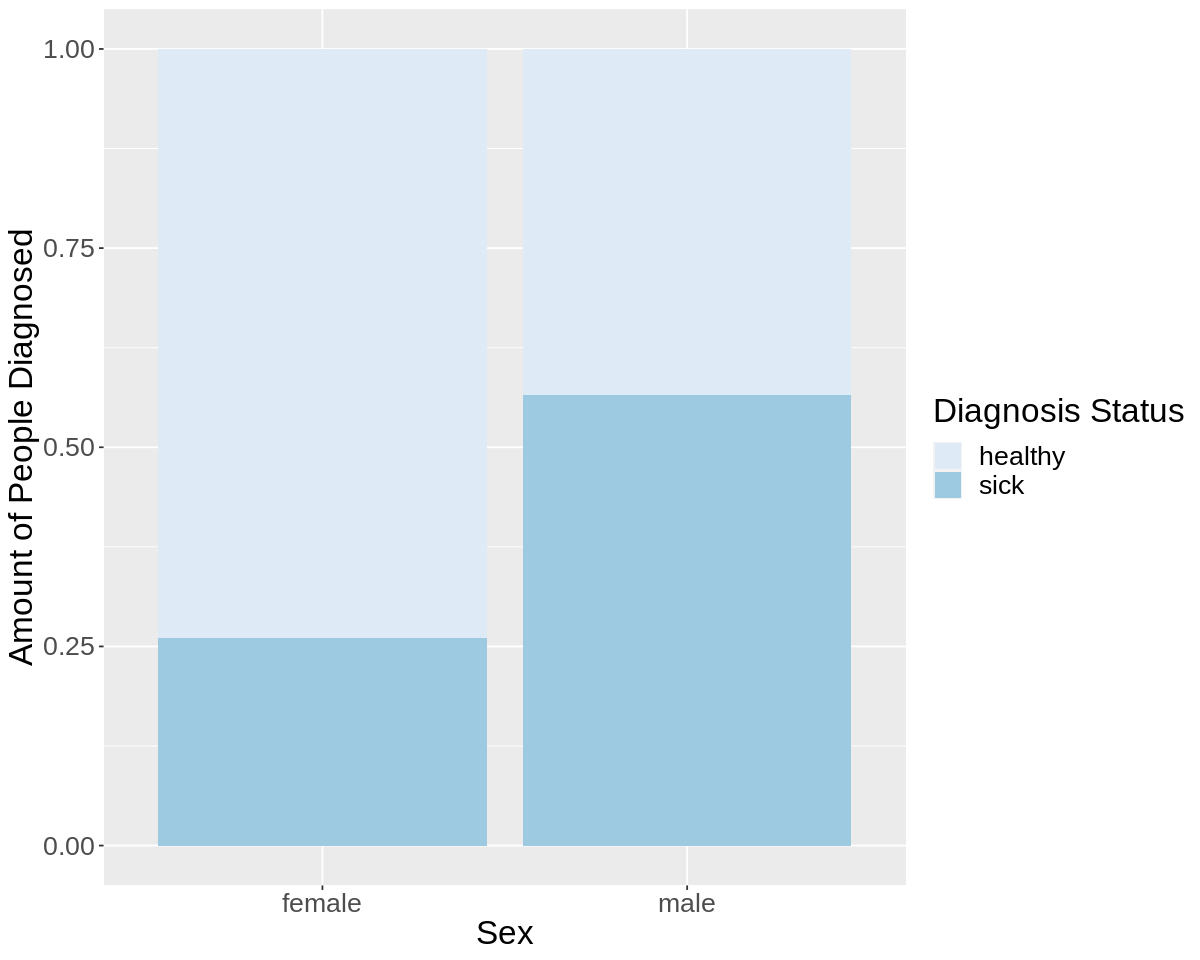

In [152]:
heart_disease_plot2 <- ggplot(heart_disease_data, aes(x = sex, fill = num)) + 
    geom_bar(position = "fill") + 
    xlab("Sex") +
    ylab("Amount of People Diagnosed") +
    labs(fill = "Diagnosis Status") +
    theme(text = element_text(size = 20)) + 
    scale_fill_brewer(palette = "Blues")
heart_disease_plot2

We will conduct the data analysis using the following variables: age, sex, chest_pain, cholesterol, max_hr and resting_bp. We believe that these variables will have the highest value when it comes to making a predictive data frame for heart disease. Using these variables hopefully we can find a pattern in diagnosis to help make predictions about class. We plan to visualize the results in the form of a color-coded scatter plot where the points of sick and healthy individuals can be plotted and an unknown point can be added, where you might be able to visually predict an answer, but also use the code to produce a prediction as well. 

We expect to find a few correlations between the variables that we have chosen, like in the above visualization that men seem to be diagnosed as sick more than females. Finding these correlations could have a great impact because many of these variables can be altered in everyday life or worked on by the average individual. This could lead individuals to striving for better lives and possibly even working to decrease heart disease diagnosis, or help individuals be more proactive if they fall into the given frame of a sick individual. We think that this could lead to more questions about how predictive data frames can be used far more often to give people an idea of what the likelihood of developing such a disease would be. We also believe that questions will be raised about how people choose to live their lives can be impactful, and increase the likelihood of these diseases developing even if predisposed. 